In [2]:
import pandas as pd 
import pymysql 
import pymysql.cursors
import numpy as np
from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [4]:
# dog1 = pd.read_excel("c:\import\gihosung\dog1_test_result.xlsx")
# dog2 = pd.read_excel("c:\import\gihosung\dog2_test_result.xlsx")
# cat_zero = pd.read_excel("c:\import\gihosung\cat_zero_test_result.xlsx")
# cat_zero2 = pd.read_excel("c:\import\gihosung\cat_zero2_test_result.xlsx")
cat_dongdong = pd.read_excel("c:\import\gihosung\s_1_test_result\cat_dongdong_test_result.xlsx")

In [19]:
x = cat_dongdong[['p_cow' , 'p_chicken' , 'p_fish' , 'p_turkey' , 'p_sheep' ,  'p_salmon' , 'p_tuna'  , 'o_chicken' , 'o_fish' , 'flavor']]
y = cat_dongdong[['ox_score']]

In [30]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리

x

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장
features = ['p_cow' , 'p_chicken' , 'p_fish' , 'p_turkey' , 'p_sheep' ,  'p_salmon' , 'p_tuna'  , 'o_chicken' , 'o_fish' , 'flavor']
pd.DataFrame(x, columns=features).head()

# 지금 변수들의 스케일이 0~1로 모두 동일하기에 굳이 표준화 할 필요 없는것 같음

,p_cow,p_chicken,p_fish,p_turkey,p_sheep,p_salmon,p_tuna,o_chicken,o_fish,flavor
0,-0.377964,0.881917,-0.67420,-0.577350,-0.377964,-0.577350,-0.258199,-1.133893,-1.133893,1.0
1,-0.377964,0.881917,1.48324,-0.577350,-0.377964,-0.577350,-0.258199,-1.133893,-1.133893,1.0
2,-0.377964,-1.133893,-0.67420,-0.577350,2.645751,1.732051,-0.258199,0.881917,0.881917,1.0
3,-0.377964,-1.133893,1.48324,-0.577350,-0.377964,-0.577350,-0.258199,0.881917,0.881917,1.0
4,-0.377964,0.881917,-0.67420,1.732051,-0.377964,1.732051,-0.258199,0.881917,0.881917,-1.0


,pc_ratio
p_cow,2.761754e-01
p_chicken,1.720873e-01
p_fish,1.469046e-01
p_turkey,1.373905e-01
p_sheep,1.022930e-01
p_salmon,8.415279e-02
p_tuna,4.897933e-02
o_chicken,2.040502e-02
o_fish,1.161200e-02
flavor,1.122967e-33


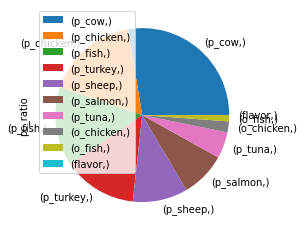

In [31]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(x)

PC_score = pca.transform(x)
#x = 독립변수모음

# # pca의 eigen_vector
# pca.components_

# #explained_variacne를 통해서 PC값의 설명력을 확인 할 수 있다.PC값이 클수록 설명력이 높다.
# pca.explained_variance_ 

# # explained_variance 비율로 확인
ratio = pca.explained_variance_ratio_ 



# 설명력 정도 확인
df_v = pd.DataFrame(ratio, index = [['p_cow' , 'p_chicken' , 'p_fish' , 'p_turkey' , 'p_sheep' ,  'p_salmon' , 'p_tuna'  , 'o_chicken' , 'o_fish' , 'flavor']], columns=['pc_ratio'])
df_v.plot.pie(y='pc_ratio')
df_v
# 0,1,2,3,4

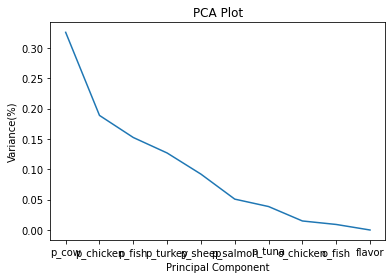

In [12]:
ax = plt.plot( ['p_cow' , 'p_chicken' , 'p_fish' , 'p_turkey' , 'p_sheep' ,  'p_salmon' , 'p_tuna'  , 'o_chicken' , 'o_fish' , 'flavor'], ratio)
plt.ylabel('Variance(%)')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

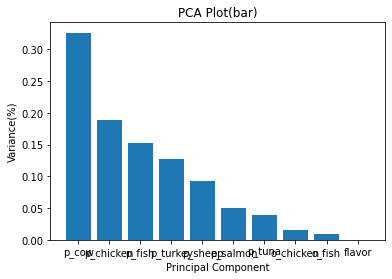

In [13]:
ax = plt.bar(x = range(len(ratio)), height=ratio, tick_label=['p_cow' , 'p_chicken' , 'p_fish' , 'p_turkey' , 'p_sheep' ,  'p_salmon' , 'p_tuna'  , 'o_chicken' , 'o_fish' , 'flavor'])
plt.ylabel('Variance(%)')
plt.xlabel('Principal Component')
plt.title('PCA Plot(bar)')
plt.show()


# 위 3개의 그래프를 통해 주성분을 5개로 해야겠다는것을 정함

In [32]:
pca = PCA(n_components=5) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5'])
# 주성분으로 이루어진 데이터 프레임 구성

# for index, data in enumerate(cat_dongdong['little_score'].tolist()) : 
#     principalDf['score'][index = data]
    
principalDf = principalDf.assign(score = cat_dongdong['little_score'].tolist())

df = principalDf

In [33]:
model = smf.ols (formula= 'score ~ PC1 + PC2 + PC3 + PC4 + PC5  ',data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.383
Method:                 Least Squares   F-statistic:                    0.1690
Date:                Thu, 13 Jan 2022   Prob (F-statistic):              0.968
Time:                        15:01:38   Log-Likelihood:                -29.858
No. Observations:                  16   AIC:                             71.72
Df Residuals:                      10   BIC:                             76.35
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8125      0.495      5.687      0.0

C:\visual studio\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
